<a href="https://colab.research.google.com/github/Thulith95/HoloClean-org/blob/master/UF_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libs 

In [1]:
# libraries used on this notebook
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS

from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6

import string
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Import Data 


In [2]:
!wget -O raw.csv "https://raw.githubusercontent.com/Thulith95/Hello-World-/master/asset_finance_synthetic.csv?token=AO2KFS7PIYVIXS7ANJNPKIS6RK2W2"
for_analysis_data = pd.read_csv('/content/raw.csv')

--2020-04-15 04:24:25--  https://raw.githubusercontent.com/Thulith95/Hello-World-/master/asset_finance_synthetic.csv?token=AO2KFS7PIYVIXS7ANJNPKIS6RK2W2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-04-15 04:24:26 ERROR 404: Not Found.



EmptyDataError: ignored

#Cleaning


In [0]:
for_analysis = for_analysis_data
#removing spaces in headers
for_analysis.columns = for_analysis.columns.str.replace(' ','_')
#cleaning indexing
for_analysis.index = range(len(for_analysis))

#removing unwanted cols
for_analysis = for_analysis.drop(['Unnamed:_0', 'DATASOURCE', 'DEAL_COUNT',
       'Reporting_Division', 'Product_Type', 'CURRENCYCODE'],axis=1)

for_analysis.shape


(80, 15)

#Defining functions

In [0]:
#looking for NA values
def visualise_null(data):
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.xticks(range(len(data.columns)), data.columns, rotation=60)
    plt.show()

#looking for zero values
def visualise_zero(data):
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='viridis')
    plt.xticks(range(len(data.columns)), data.columns, rotation=60)
    plt.show()
#tracking changes to matrix
def visualise_change(original,corrupt):
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(original==corrupt, yticklabels=False, cbar=False, cmap='viridis')
    plt.xticks(range(len(original.columns)), original.columns, rotation=60)
    plt.show()

# add two random changes to string
def rand_mutate(data):
    orig = data
    char1=random.choice(string.ascii_lowercase)  #random character1
    char2=random.choice(string.ascii_lowercase)  #random character2

    while char1 == char2:                   # #check if both char are equal
      char2=random.choice(string.ascii_lowercase)

    ran_pos1 = random.randint(0,len(orig)-1)  #random index1
    ran_pos2 = random.randint(0,len(orig)-1)  #random index2

    while ran_pos1 == ran_pos2:            #check if both pos are equal
      ran_pos2 = random.randint(0,len(orig)-1)

    orig_list = list(orig)
    orig_list[ran_pos1]=char1
    orig_list[ran_pos2]=char2
    mod = ''.join(orig_list)
    return mod
  

#Data summary

In [0]:
for_analysis.columns

Index(['FACILITY_ID', 'LEDGER_ID', 'CLIENT_CRN', 'CLIENT_NAME',
       'Facility_Live_Date', 'Reporting_Period', 'label', 'Opening_FIU_Amount',
       'Collections', 'Payments', 'FX_Adjustment', 'Closing_FIU',
       'FIU_Reconciliation', 'Daily_AVG_FIU', 'FXRATE_EOM'],
      dtype='object')

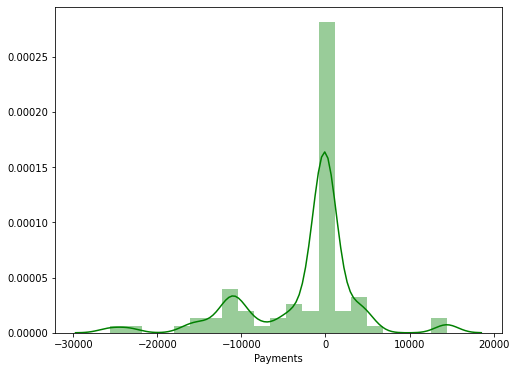

In [0]:
#Interest rates 
#for_analysis = for_analysis[for_analysis.int_rate.notnull()]
#for_analysis.int_rate.describe()
sns.distplot(for_analysis.Payments, axlabel = "Payments", color="green")

#Data corruption


In [0]:
# Corruption control
empty_count = 5 #total empty cells
duplicate_count = 2 #total duplicate entires
synt_error_count = 5  #total syntatic errors in house status
integrity_error_count = 5 #total integrity errors in zip code
empt_cols_list = ['FACILITY_ID', 'LEDGER_ID', 'CLIENT_CRN', 'CLIENT_NAME',
       'Facility_Live_Date', 'Reporting_Period', 'label', 'Opening_FIU_Amount',
       'Collections', 'Payments', 'FX_Adjustment', 'Closing_FIU',
       'FIU_Reconciliation', 'Daily_AVG_FIU', 'FXRATE_EOM'] #cols to add empty cells in 

# generating corruption locations

rand_cols = random.choices(empt_cols_list,k = empty_count)
rand_rows = random.sample(range(for_analysis.shape[0]),empty_count+synt_error_count+integrity_error_count)


In [0]:
#duplicate rows
corrupt_for_analysis = for_analysis

duplicate_row = corrupt_for_analysis.sample(duplicate_count)
corrupt_for_analysis = pd.concat([corrupt_for_analysis, duplicate_row])
corrupt_for_analysis = corrupt_for_analysis.sort_index()
corrupt_for_analysis.index = range(corrupt_for_analysis.shape[0])
corrupt_for_analysis
corrupt_for_analysis_with_dup = corrupt_for_analysis
corrupt_for_analysis_with_dup = corrupt_for_analysis.copy(deep=True)

In [0]:
#missing values 
for i in range(empty_count):
  corrupt_for_analysis.at[rand_rows[i],rand_cols[i]]= 0
 
corrupt_for_analysis.shape

(82, 15)

In [0]:
#syntatic errors


for i in range(synt_error_count):
  mut = rand_mutate(corrupt_for_analysis.iloc[rand_rows[i+empty_count]]['CLIENT_NAME'])
  corrupt_for_analysis.at[rand_rows[i+empty_count],'CLIENT_NAME']= mut
 



In [0]:
for_analysis.head(1)


,FACILITY_ID,LEDGER_ID,CLIENT_CRN,CLIENT_NAME,Facility_Live_Date,Reporting_Period,label,Opening_FIU_Amount,Collections,Payments,FX_Adjustment,Closing_FIU,FIU_Reconciliation,Daily_AVG_FIU,FXRATE_EOM
0,H01533_SENTINEL,H02221,UI90193929,Horsepower Racing (uk) Ltd,2018-04-23,2019-08-31,Live,8374.206352,3716.23811,-10675.678892,0.001293,2924.913439,13352.861137,56899.922034,0.999904


In [0]:
#Integrity issues 
invalid_pool = for_analysis_data
invalid_pool = invalid_pool[invalid_pool['zip_code'] >605]

for i in range(integrity_error_count):
  corrupt_for_analysis.at[rand_rows[i+empty_count+synt_error_count],'zip_code']= invalid_pool.iloc[random.randint(0, invalid_pool.shape[0])]['zip_code']



#Visualisation of changes made

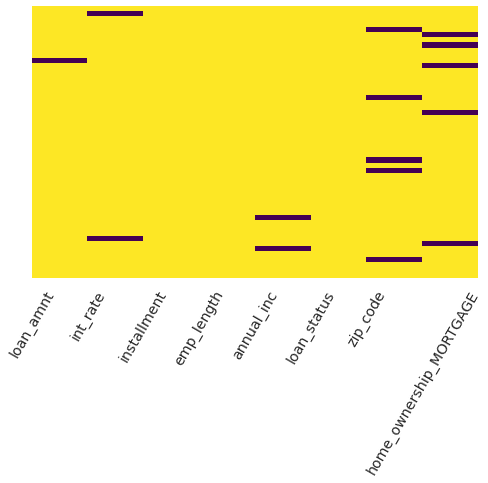

In [0]:
#Show changes 
#Note: this does not include duplicates of the entries

visualise_change(corrupt_for_analysis_with_dup,corrupt_for_analysis)

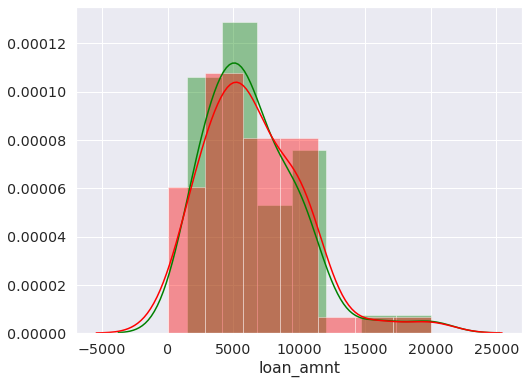

In [0]:
#interest rates
sns.distplot(for_analysis.loan_amnt, axlabel = "loan amount", color="green")
sns.distplot(corrupt_for_analysis.loan_amnt, axlabel = "loan amount", color="red")

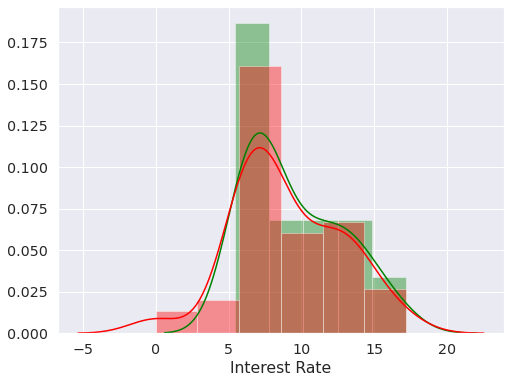

In [0]:
sns.distplot(for_analysis.int_rate, axlabel = "Interest Rate", color="green")
sns.distplot(corrupt_for_analysis.int_rate, axlabel = "Interest Rate", color="red")

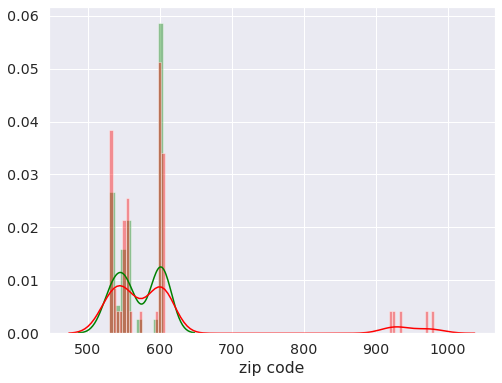

In [0]:
sns.distplot(for_analysis.zip_code, axlabel = "zip code", color="green",bins = 10)
sns.distplot(corrupt_for_analysis.zip_code, axlabel = "zip code", color="red",bins = 100)